## **<u>Data Loading</u>**

In [1]:
# Libraries
import os
import glob
import tifffile as tiff
from PIL import Image
import imageio.v2 as imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.random_projection import SparseRandomProjection

In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tifffile

In [4]:
file_path = "C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/SS-160/160/08_04_SS_T0_Fibro_with_Fibrillarin_63x_4x4_3rdScan_c0_g000.tif"
img_1 = tiff.imread(file_path)
print(img_1.shape)

(38, 1024, 1024)


## **<u>Data Examine</u>**

In [5]:
# Displaying Slicing
def display_slice(slice_num):
    plt.imshow(img_1[slice_num], cmap='gray')
    plt.title(f'Slice {slice_num}')
    plt.axis('off')
    plt.show()

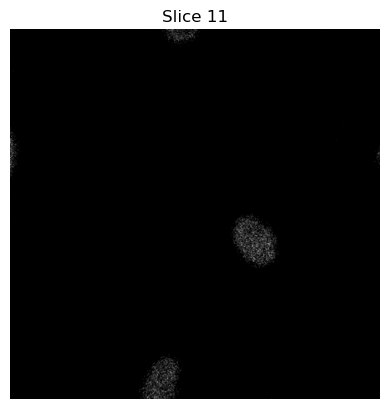

In [6]:
display_slice(11)

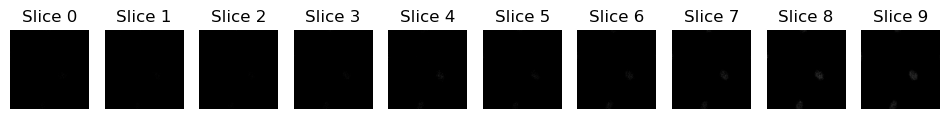

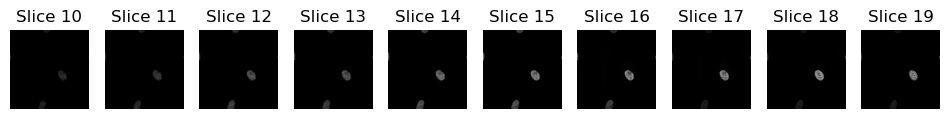

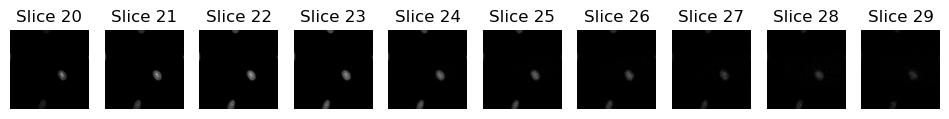

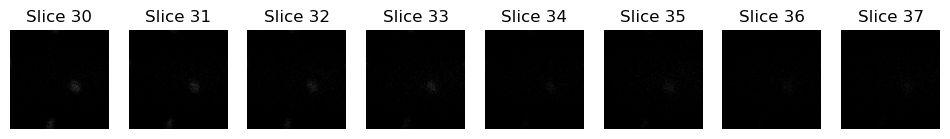

In [8]:
def plot_slices_batch(img_3d, batch_size=10):
    num_slices = img_3d.shape[0]
    for start_idx in range(0, num_slices, batch_size):
        end_idx = min(start_idx + batch_size, num_slices)
        plot_slices(img_3d, list(range(start_idx, end_idx)))

plot_slices_batch(img_1, batch_size=10)

In [9]:
# Figuring high intensity of the image
tif_image = img_1
print("3D image px value range:", np.min(tif_image), "to", np.max(tif_image))

3D image px value range: 0 to 217


We are getting a range of **0** to **217** pixels among the slices of the 3D image we loaded. 

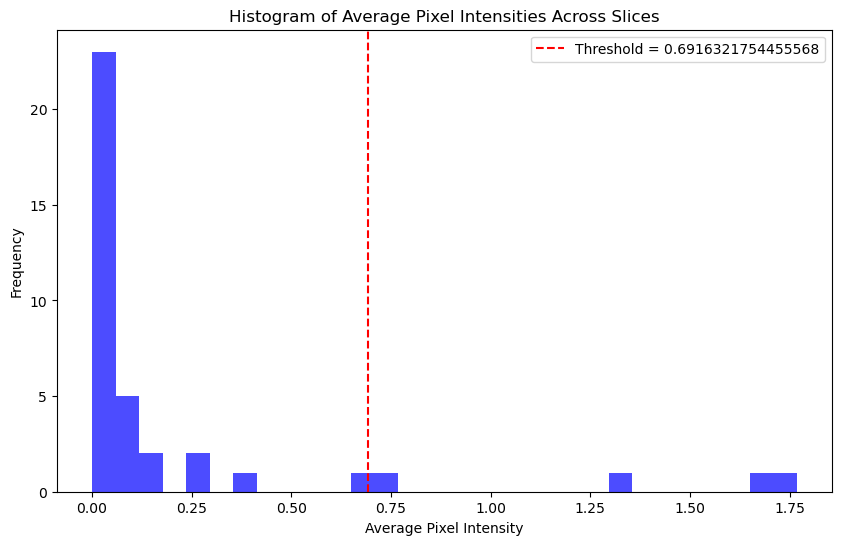

In [11]:
# Calculate average intensities
avg_intensities = [np.mean(img_1[i]) for i in range(img_1.shape[0])]
thr= np.percentile(avg_intensities, 90)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_intensities, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Average Pixel Intensities Across Slices')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Frequency')
plt.axvline(x=thr, color='red', linestyle='--', label=f'Threshold = {thr}')
plt.legend()
plt.show()

#### ***Code Explaination:***

**1. Calculating Average Intensities:** Imagine you have a bookshelf, where each book represents a slice of your 3D image. Each page of a book (slice) has various shades of grey (pixel intensities). What you're doing here is flipping through each book (slice) and calculating the average shade of grey (pixel intensity) of its pages (pixels). The `avg_intensities` list will then contain the average shade of grey for each book on your shelf.
```
avg_intensities = [np.mean(img_1[i]) for i in range(img_1.shape[0])]
```

**2. Determining the Threshold:** Now, imagine you want to separate the really dark books from the lighter ones. You decide that the "dark" books are those darker than 90% of all the books on the shelf. The `np.percentile(avg_intensities, 90)` function finds that shade of grey which is darker than 90% of all your books, and that’s your threshold `thr`.
```
thr = np.percentile(avg_intensities, 90)
```

**3. Plotting the Histogram:** Here, you're making a chart to see how many books fall into different categories of darkness. You create 30 categories (bins), and for each category, you count how many books belong there. It's like sorting the books by their darkness and then counting how many you have in each sorted pile. The chart (histogram) will show you this sorting and counting visually.
```
plt.figure(figsize=(10, 6))
plt.hist(avg_intensities, bins=30, color='blue', alpha=0.7)
```

**4. Adding the Threshold Line:** On your chart, you want to highlight the point that separates the dark books from the lighter ones, according to your earlier decision. You draw a red dashed line (the threshold) on the chart. All the books (slices) to the right of this line are considered "dark" because their average shade is darker than the threshold.
```
plt.axvline(x=thr, color='red', linestyle='--', label=f'Threshold = {thr}')
```


**5. Beautifying the Chart:** Finally, you label your chart to make it understandable. You give it a title, label the horizontal axis as the "Average Pixel Intensity" (how dark a book is), and the vertical axis as "Frequency" (how many books fall into each category of darkness). You also add a legend to explain what the red dashed line means. Showing the chart (`plt.show()`) is like putting it up on the wall for everyone to see.
```
plt.title('Histogram of Average Pixel Intensities Across Slices')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
```

A threshold of **0.6217** gives us optimal intensity of slices.

## **<u>Data Filtering & Saving</u>**

In [12]:
# Filtering high-intensity slices

def high_int_flt(img_3D, thr):
    selected_slices = []
    for slice_idx in range(img_3D.shape[0]):
        slice_2d = img_3D[slice_idx]
        avg_int = np.mean(slice_2d)
        if avg_int > thr:
            selected_slices.append(slice_idx)
    return selected_slices

thr = 0.6217

selected_slices = high_int_flt(img_1, thr)
print(f"Selected slices: {selected_slices}")


Selected slices: [16, 17, 18, 19, 20]


In [13]:
# Saving filtered files

sav_dir = "C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1"

if not os.path.exists(sav_dir):
    os.makedirs(sav_dir)
    
for slice_index in selected_slices:  # Corrected variable name here
    # Extract the 2D slice from the 3D image array
    slice_img = img_1[slice_index]
    
    # Construct the file name and path
    file_name = f"slice_{slice_index}.jpg"  # Corrected file extension to match your usage
    file_path = os.path.join(sav_dir, file_name)  # Corrected variable name and parameters
    
    # Save the slice to the specified directory
    imageio.imwrite(file_path, slice_img)
    print(f"Saved {file_path}")

Saved C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1\slice_16.jpg
Saved C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1\slice_17.jpg
Saved C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1\slice_18.jpg
Saved C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1\slice_19.jpg
Saved C:/Users/jatin/Desktop/Sem 3/Internship/RA-AIHI/Assignments/T1/Slices-SS-160-1\slice_20.jpg


## **<u>Cropping</u>**

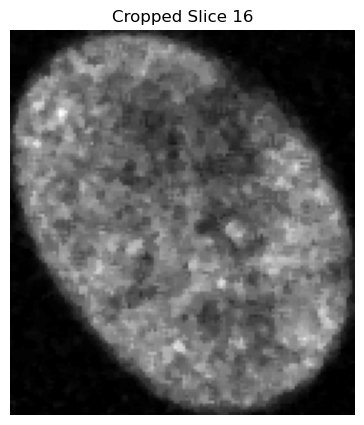

In [14]:
import cv2

# Choose a slice index from your selected_slices list, e.g., the first one
slice_index = selected_slices[0]
slice_img = img_1[slice_index]

# Convert slice to 8-bit if not already (necessary for some OpenCV functions)
slice_img_8bit = cv2.normalize(slice_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Apply a threshold to get a binary image
_, thresh_img = cv2.threshold(slice_img_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour based on area and get its bounding box
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the original image using the bounding box coordinates
cropped_img = slice_img[y:y+h, x:x+w]

# Show the cropped image
plt.figure(figsize=(5, 5))
plt.imshow(cropped_img, cmap='gray')
plt.title(f'Cropped Slice {slice_index}')
plt.axis('off')
plt.show()

#### ***Code Explaination:***

**1. Preparing the Image:** First, we're working with a slice of a 3D image, which is like choosing a single page from a thick book to examine more closely. This slice is a 2D array of pixel intensities, which we can think of as a detailed grayscale photograph.
```
slice_index = selected_slices[0]
slice_img = img_1[slice_index]
```

**2. Converting to 8-bit:** Images can be stored in various "depths" of color or intensity information. Think of this as the difference between a very detailed map with thousands of elevation levels versus a simpler map with just a few. Converting an image to 8-bit means we're simplifying our detailed map to just 256 levels of gray (from 0 to 255), making it easier to work with for many processing tasks.
```
slice_img_8bit = cv2.normalize(slice_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
```

**3. Applying a Threshold:** Applying a threshold to an image is like making a stencil from a photograph. We decide on a level of gray that we consider the cutoff between black and white. Everything darker than this level becomes black, and everything lighter becomes white. This helps us isolate the features of interest (like cells) by turning them into solid shapes, making them easier to identify.
```
_, thresh_img = cv2.threshold(slice_img_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
```

**4. Finding Contours:** After thresholding, we look for the outlines of all the shapes (our cells) we've just highlighted. Imagine using a highlighter on a page to circle every item of interest; finding contours is somewhat like that, but instead of circling, we're mathematically identifying the edges of these shapes.
```
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
```


**5. Identifying the Largest Contour:** Among all the shapes we've found, we're interested in the biggest one, assuming it represents the area with the cells. It's like looking at a picture with several objects and deciding to focus on the largest object for further examination.
```
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
```

**6. Cropping the Image:** Once we've identified the largest contour, we want to "cut out" this section of the image for a closer look. This is akin to cutting out a picture from a magazine that we want to keep. We use the bounding rectangle (a simple box) around our contour as the guideline for where to cut.
```
cropped_img = slice_img[y:y+h, x:x+w]
```


**7. Displaying the Cropped Image:** Finally, we display this cropped section, much like framing the picture we cut out from the magazine, to examine it more closely and appreciate its details.
```
plt.figure(figsize=(5, 5))
plt.imshow(cropped_img, cmap='gray')
plt.title(f'Cropped Slice {slice_index}')
plt.axis('off')
plt.show()
```

## **<u>SRP</u> - Trial**

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.random_projection import SparseRandomProjection

#1. Flatten cropped image
flat_img = cropped_img.flatten().reshape(1, -1)

#2. SRP intance
n_components = 100
srp = SparseRandomProjection(n_components = n_components)

#3. Fit & Transform
srp_feature = srp.fit_transform(flat_img)


#Output
print(f"Original shape: {flat_img.shape}")
print(f"Tranformed shape: {srp_feature.shape}")

Original shape: (1, 16080)
Tranformed shape: (1, 100)


#### ***Code Explaination:***

**1. Flatten the Cropped Image::** Converts the cropped image (a 2D array) into a 1D array by calling `.flatten()`, making it suitable for the SRP transformation. The `.reshape(1, -1)` ensures the array is 2D with one sample for compatibility with `fit_transform`.
```
flattened_img = cropped_img.flatten().reshape(1, -1)
```

**2. Create an SRP Instance:**  Initializes an instance of `SparseRandomProjection` from scikit-learn's library with `n_components` specifying the desired dimensionality of the transformed data. The choice of `n_components` depends on the desired level of dimensionality reduction and the nature of your dataset.
```
n_components = 100
srp = SparseRandomProjection(n_components=n_components)
```

**3. Fit and Transform:** The SRP instance is applied to the flattened image data to perform the random projection, reducing its dimensionality. The original shape of the data and its new shape after the transformation are printed to demonstrate the effect of the SRP.
```
srp_features = srp.fit_transform(flattened_img)

print(f"Original shape: {flattened_img.shape}")
print(f"Transformed shape: {srp_features.shape}")
```

## **<u>SRP</u> - 3D**

## SRP vs specific implementation:

Based on the detailed algorithm description from the paper, your SRP implementation aligns with the foundational aspects of the method. However, the comprehensive approach involves extracting features from cubic patches using multiple hyperplanes within each patch, which was not explicitly detailed in your earlier code snippet. Ensuring your implementation captures both global patterns and local variations by applying SRP across multiple planes and concatenating these features into a robust descriptor is crucial. It might be beneficial to revisit the feature extraction step to ensure it fully captures the method described in the paper, particularly the use of cubic patches and hyperplane generation within those patches for 3D SRP feature extraction.